In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#display
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [8]:
#loading dataset
file_path=r"C:\Users\ADMIN\Desktop\Vois\1730285881-Airbnb_Open_Data.xlsx"
df=pd.read_excel(file_path)
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,0.0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,0.0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,1.0,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,1.0,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,0.0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [12]:
#info
print("Shape of the dataset", df.shape)
print("\nDatset Info:\n")
print(df.info)

print("\nSummary Stats:\n")
print(df.describe(include="all"))

Shape of the dataset (102599, 26)

Datset Info:

<bound method DataFrame.info of              id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       800

In [13]:
#missing values
missing=df.isnull().sum()
missing=missing[missing>0]
print("Missing values per column:\n",missing)

Missing values per column:
 NAME                                 270
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        54843
license                           102597
dtype: int64


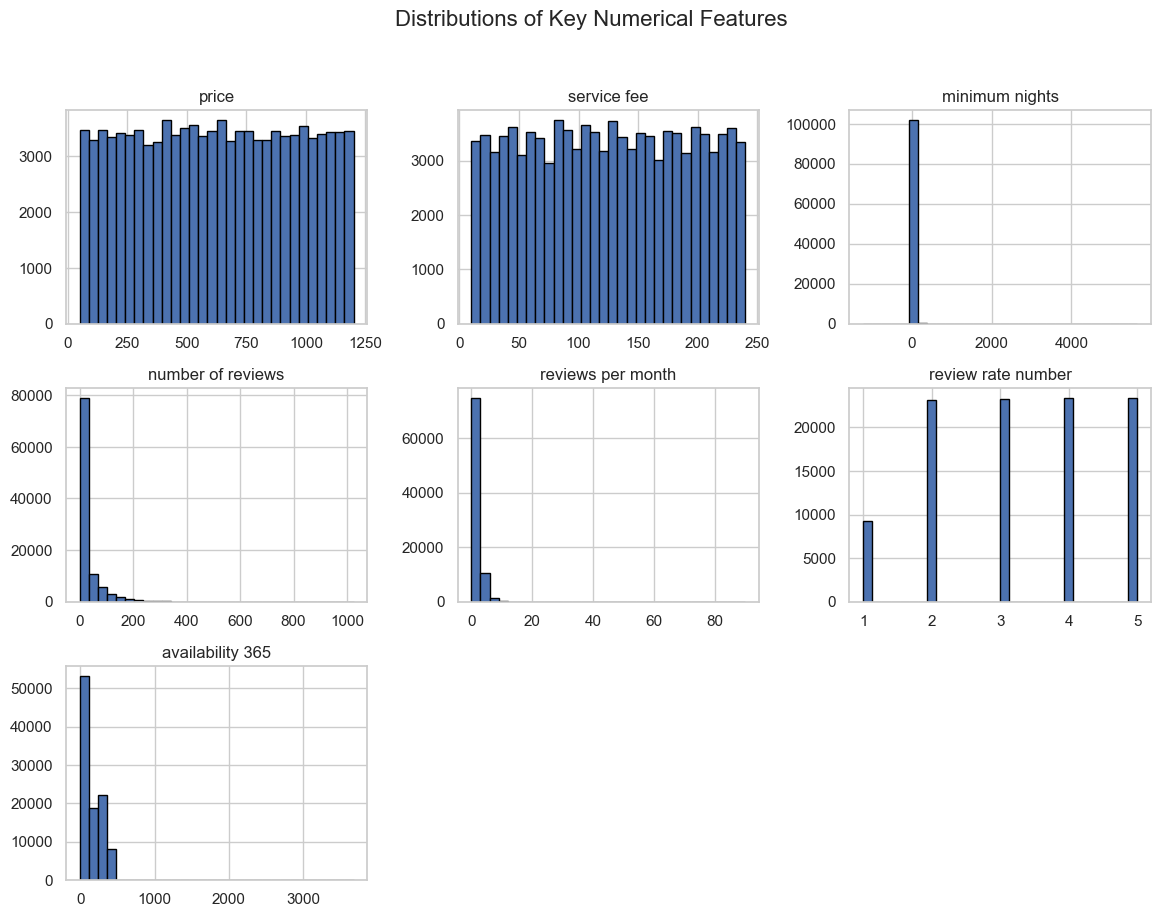

In [14]:
#Distribution of Numerical Columns
df[['price','service fee','minimum nights','number of reviews',
    'reviews per month','review rate number','availability 365']] \
    .hist(figsize=(14,10), bins=30, edgecolor="black")
plt.suptitle("Distributions of Key Numerical Features", fontsize=16)
plt.show()


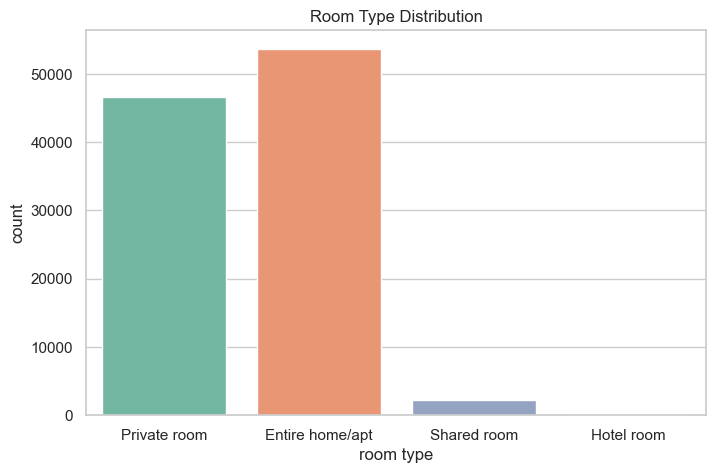

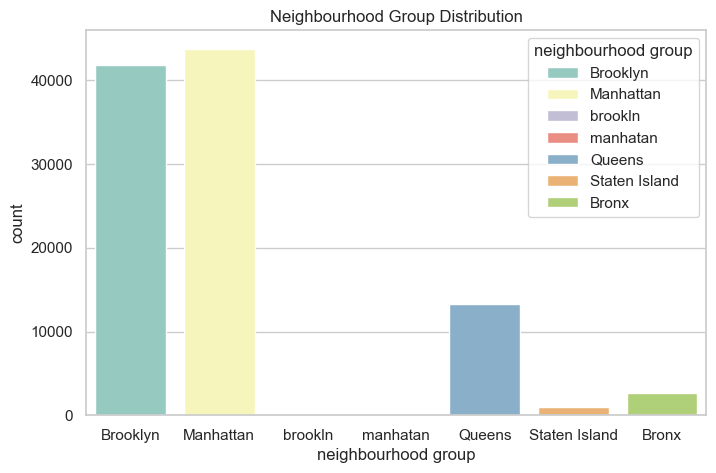

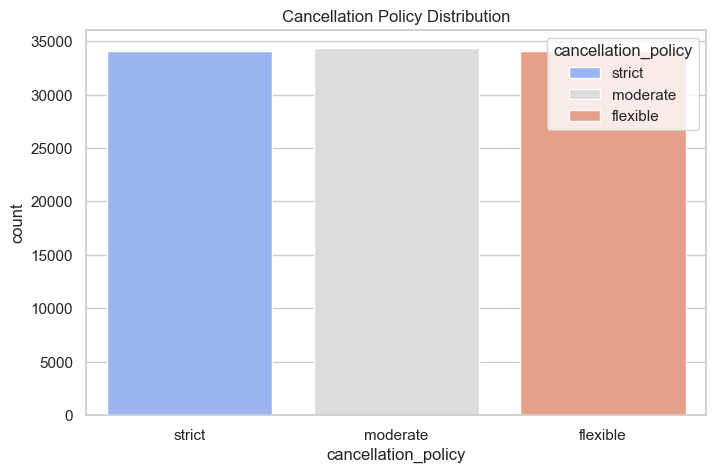

In [21]:
#Categorical Analysis
#Room Type
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="room type",hue="room type",palette="Set2")
plt.title("Room Type Distribution")
plt.show()

#Neighbourhood Group
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="neighbourhood group", hue="neighbourhood group", palette="Set3")
plt.title("Neighbourhood Group Distribution")
plt.show()

#Cancellation Policy
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="cancellation_policy", hue="cancellation_policy", palette="coolwarm")
plt.title("Cancellation Policy Distribution")
plt.show()


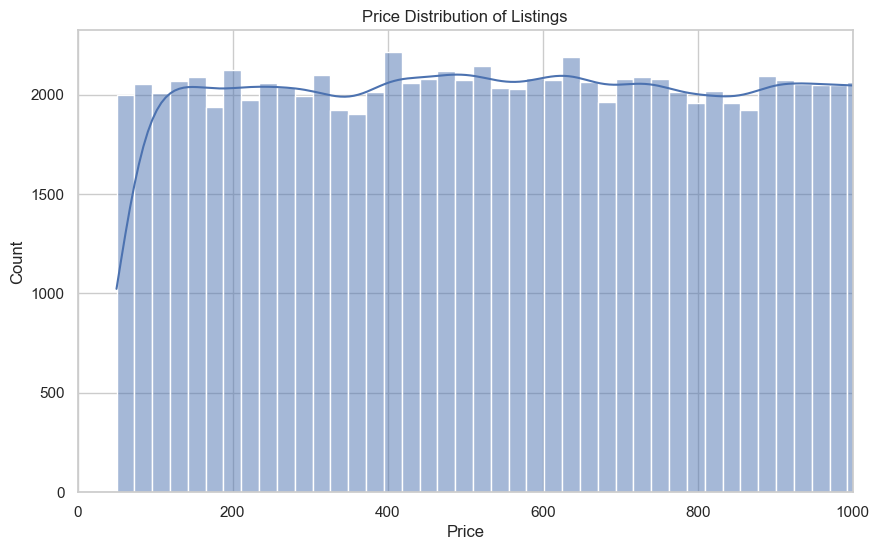

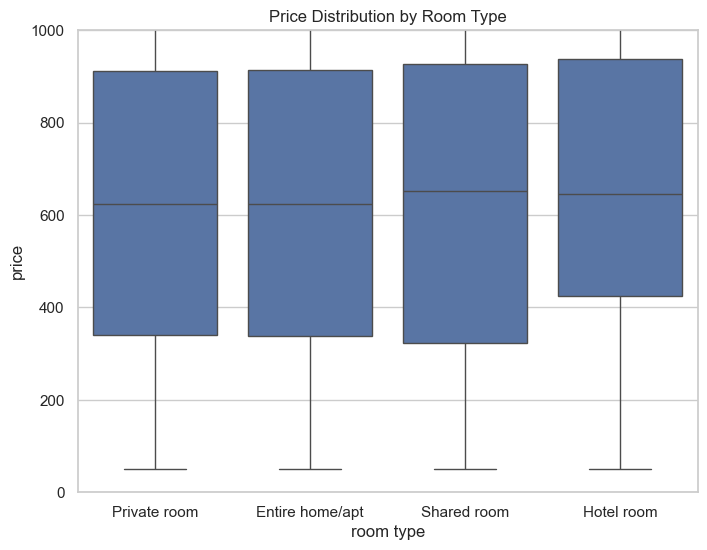

In [22]:
#Price Analysis
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Price Distribution of Listings")
plt.xlabel("Price")
plt.ylabel("Count")
plt.xlim(0, 1000)  # focus on reasonable prices
plt.show()

# Boxplot for Price by Room Type
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="room type", y="price")
plt.ylim(0, 1000)  # limit y-axis for clarity
plt.title("Price Distribution by Room Type")
plt.show()


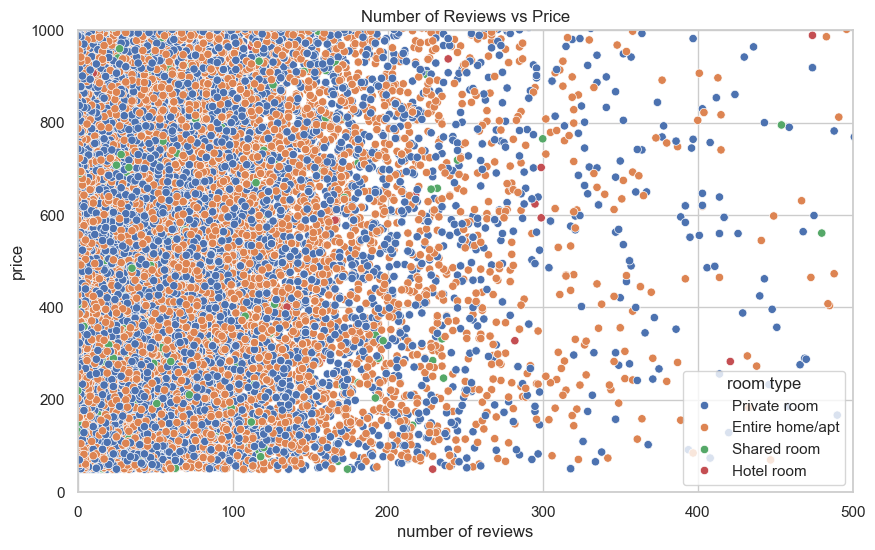

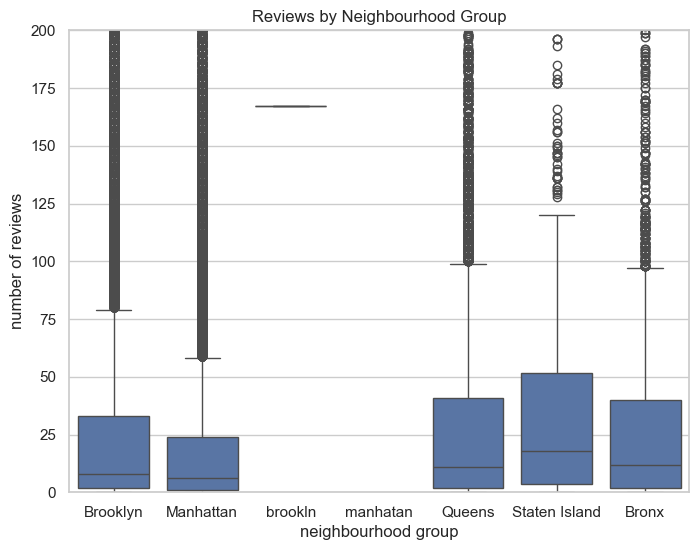

In [23]:
# Reviews Analysis 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="number of reviews", y="price", hue="room type")
plt.title("Number of Reviews vs Price")
plt.xlim(0, 500)   # limit to avoid extreme outliers
plt.ylim(0, 1000)
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="neighbourhood group", y="number of reviews")
plt.title("Reviews by Neighbourhood Group")
plt.ylim(0, 200)
plt.show()


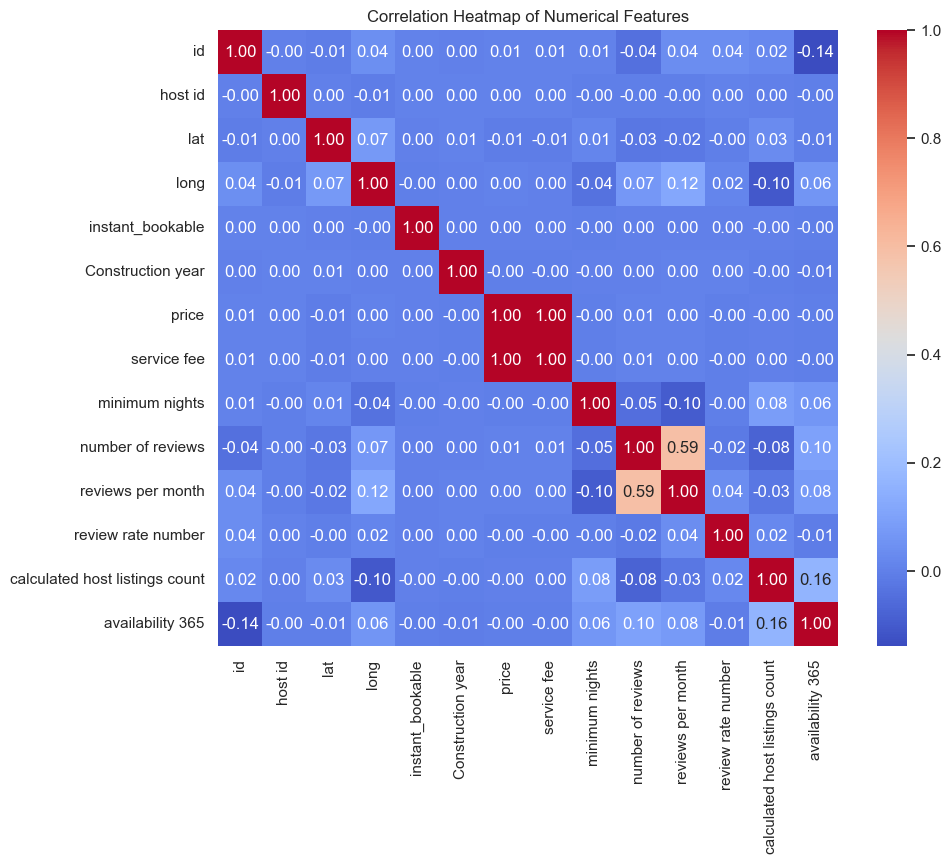

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()
